In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
%matplotlib inline

In [36]:
data = pd.read_csv('insurance_claims.csv')
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [37]:
selected_features = ['policy_state','insured_sex', 'insured_education_level', 'insured_occupation', 'auto_make', 'auto_model']
X = data[selected_features] # features
y = data['total_claim_amount'] # target variable
X.head()

,policy_state,insured_sex,insured_education_level,insured_occupation,auto_make,auto_model
0,OH,MALE,MD,craft-repair,Saab,92x
1,IN,MALE,MD,machine-op-inspct,Mercedes,E400
2,OH,FEMALE,PhD,sales,Dodge,RAM
3,IL,FEMALE,PhD,armed-forces,Chevrolet,Tahoe
4,IL,MALE,Associate,sales,Accura,RSX


In [38]:
y.head()

0    71610
1     5070
2    34650
3    63400
4     6500
Name: total_claim_amount, dtype: int64

In [39]:
# Check for missing values
print(X.isnull().sum())

policy_state               0
insured_sex                0
insured_education_level    0
insured_occupation         0
auto_make                  0
auto_model                 0
dtype: int64


In [40]:
labeled_feature = X.copy()
label_encoder = LabelEncoder()
label_encoded = label_encoder.fit_transform(labeled_feature['insured_education_level'])
labeled_feature['insured_education_level'] = X['insured_education_level']


In [41]:
X

,policy_state,insured_sex,insured_education_level,insured_occupation,auto_make,auto_model
0,OH,MALE,MD,craft-repair,Saab,92x
1,IN,MALE,MD,machine-op-inspct,Mercedes,E400
2,OH,FEMALE,PhD,sales,Dodge,RAM
3,IL,FEMALE,PhD,armed-forces,Chevrolet,Tahoe
4,IL,MALE,Associate,sales,Accura,RSX
...,...,...,...,...,...,...
995,OH,FEMALE,Masters,craft-repair,Honda,Accord
996,IL,FEMALE,PhD,prof-specialty,Volkswagen,Passat
997,OH,FEMALE,Masters,armed-forces,Suburu,Impreza
998,IL,MALE,Associate,handlers-cleaners,Audi,A5


In [63]:
# generate a legend that maps the encoded values to the original values
label_legend = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))
# print(label_legend)

# make it a dataframe
label_legend = pd.DataFrame(label_legend.items(), columns=['Encoded Value', 'Original Value'])
label_legend.set_index('Encoded Value', inplace=True)
label_legend = label_legend.reindex()
# label_legend.drop(index=0, inplace=True, axis=0)

In [64]:
label_legend

,Original Value
Encoded Value,
0,Associate
1,College
2,High School
3,JD
4,MD
5,Masters
6,PhD


In [68]:
# One-hot encoding for nominal features
encoded_features = X.copy()
ohe = OneHotEncoder()
encoded_features = ohe.fit_transform(X[['policy_state', 'insured_sex', 'insured_occupation', 'auto_make', 'auto_model']])
encoded_features[0:5] = X['insured_education_level']


In [71]:
encoded_features[0:5]

<5x72 sparse matrix of type '<class 'numpy.float64'>'
	with 25 stored elements in Compressed Sparse Row format>

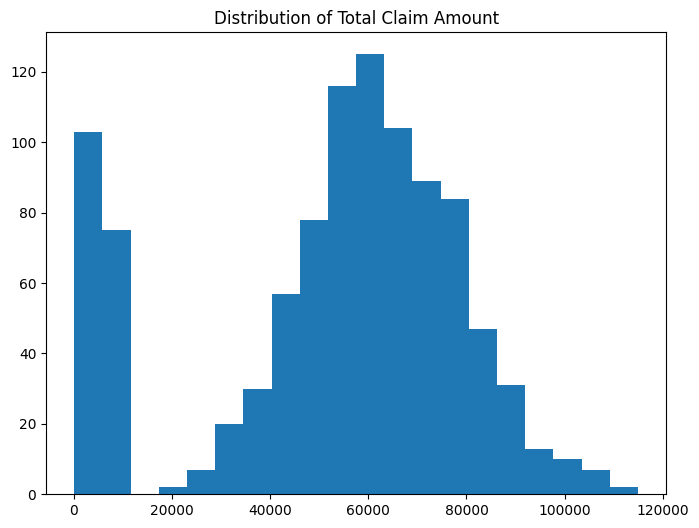

In [8]:
# Histogram of the target variable
plt.figure(figsize=(8, 6))
plt.hist(data['total_claim_amount'], bins=20)
plt.title('Distribution of Total Claim Amount')
plt.show()

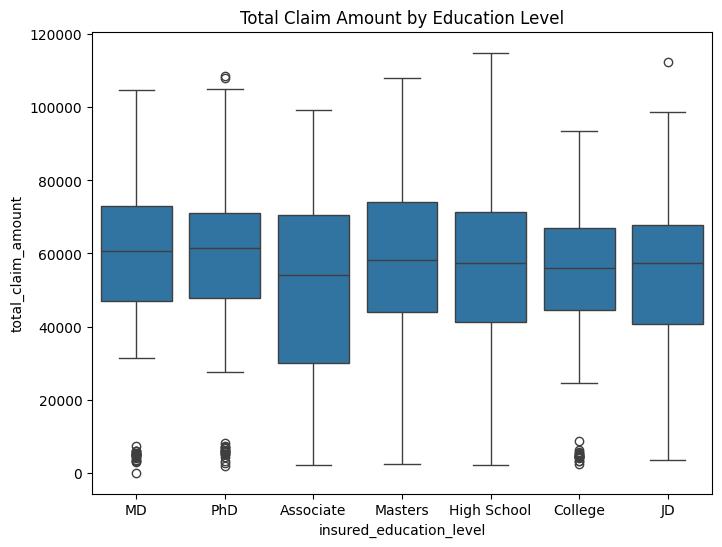

In [9]:
# Boxplot of total claim amount by insured education level
plt.figure(figsize=(8, 6))
sns.boxplot(x='insured_education_level', y='total_claim_amount', data=data)
plt.title('Total Claim Amount by Education Level')
plt.show()

In [10]:
# Create and fit the model
nb_model = GaussianNB()
nb_model.fit(X, y)

ValueError: could not convert string to float: 'OH'